In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# স্টক সিম্বল ও সময়সীমা নির্ধারণ করুন
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
data = yf.download(stocks, start="2020-01-01", end="2025-08-02")['Close']

print(data)





C:\Users\jihad\AppData\Local\Temp\ipykernel_13180\1769883367.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start="2020-01-01", end="2025-08-02")['Close']
[*********************100%***********************]  5 of 5 completed

Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2020-01-02   72.620857   94.900497   68.026016  153.042313   28.684000
2020-01-03   71.914795   93.748497   67.670158  151.136673   29.534000
2020-01-06   72.487877   95.143997   69.473846  151.527283   30.102667
2020-01-07   72.146957   95.343002   69.339645  150.145752   31.270666
2020-01-08   73.307518   94.598503   69.833183  152.537292   32.809334
...                ...         ...         ...         ...         ...
2025-07-28  214.050003  232.789993  192.580002  512.500000  325.589996
2025-07-29  211.270004  231.009995  195.750000  512.570007  321.200012
2025-07-30  209.050003  230.190002  196.529999  513.239990  319.040009
2025-07-31  207.570007  234.110001  191.899994  533.500000  308.269989
2025-08-01  202.380005  214.750000  189.130005  524.109985  302.630005

[1403 rows x 5 columns]


In [20]:
# দৈনিক রিটার্ন (%) বের করুন
returns = data.pct_change().dropna()
print(returns)  # প্রথম ৫ সারি দেখুনk


Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2020-01-03 -0.009723 -0.012139 -0.005231 -0.012452  0.029633
2020-01-06  0.007969  0.014886  0.026654  0.002584  0.019255
2020-01-07 -0.004703  0.002092 -0.001932 -0.009117  0.038801
2020-01-08  0.016086 -0.007809  0.007118  0.015928  0.049205
2020-01-09  0.021241  0.004799  0.010498  0.012493 -0.021945
...              ...       ...       ...       ...       ...
2025-07-28  0.000795  0.005833 -0.003106 -0.002355  0.030152
2025-07-29 -0.012988 -0.007646  0.016461  0.000137 -0.013483
2025-07-30 -0.010508 -0.003550  0.003985  0.001307 -0.006725
2025-07-31 -0.007080  0.017029 -0.023559  0.039475 -0.033758
2025-08-01 -0.025004 -0.082696 -0.014435 -0.017601 -0.018296

[1402 rows x 5 columns]


In [ ]:
# বার্ষিক কভ্যারিয়েন্স ম্যাট্রিক্স (Annualized)
cov_matrix = returns.cov() * 252  # 252 ট্রেডিং দিন
print("কভ্যারিয়েন্স ম্যাট্রিক্স:\n", cov_matrix)

কভ্যারিয়েন্স ম্যাট্রিক্স:
 Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    0.105442  0.070593  0.067487  0.071582  0.109927
AMZN    0.070593  0.130806  0.076984  0.074759  0.110736
GOOGL   0.067487  0.076984  0.106927  0.072022  0.093803
MSFT    0.071582  0.074759  0.072022  0.091869  0.093427
TSLA    0.109927  0.110736  0.093803  0.093427  0.463011


In [23]:
def newton_method(cov_matrix, max_iter=50, tol=1e-6):
    n = cov_matrix.shape[0]  # স্টকের সংখ্যা
    w = np.ones(n) / n  # প্রাথমিক ওজন (সমান)
    
    for i in range(max_iter):
        # গ্রেডিয়েন্ট (∇f): 2 * Σ * w
        gradient = 2 * cov_matrix @ w
        
        # হেসিয়ান ম্যাট্রিক্স (H): 2 * Σ
        hessian = 2 * cov_matrix
        
        # নিউটনের আপডেট: Δw = -H⁻¹ * ∇f
        delta_w = np.linalg.solve(hessian, -gradient)
        
        # নতুন ওজন: w_new = w + Δw
        w_new = w + delta_w
        
        # কনভার্জেন্স চেক
        if np.linalg.norm(w_new - w) < tol:
            break
            
        w = w_new
    
    # ওজন নরমালাইজ (যোগফল=১)
    return w_new / np.sum(w_new)

# অপ্টিমাল ওজন বের করুন
optimal_weights = newton_method(cov_matrix.values)  # cov_matrix.values (numpy array)
print("অপ্টিমাল ওজন:", optimal_weights)

অপ্টিমাল ওজন: [ 2.28571429  0.57142857 -0.57142857 -1.14285714 -0.14285714]


c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2451 (\N{BENGALI LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2460 (\N{BENGALI LETTER JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaco

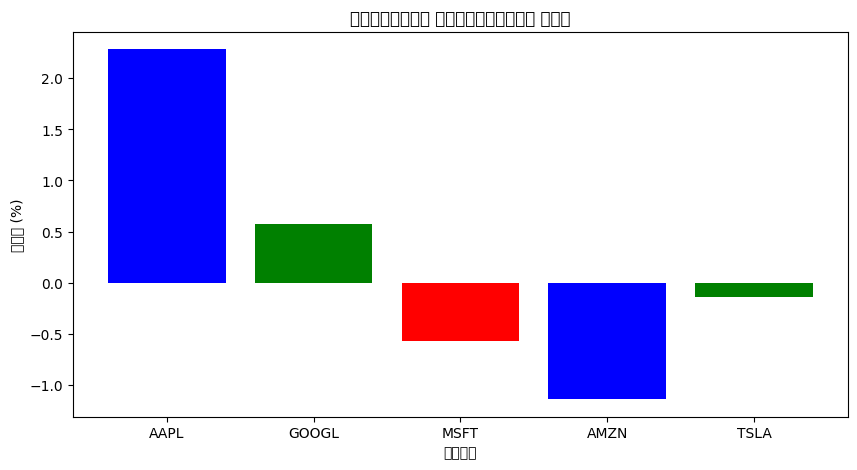

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [24]:
# অপ্টিমাল ওজনের বার চার্ট
plt.figure(figsize=(10, 5))
plt.bar(stocks, optimal_weights, color=['blue', 'green', 'red'])
plt.title('অপ্টিমাল পোর্টফোলিও ওজন')
plt.xlabel('স্টক')
plt.ylabel('ওজন (%)')
plt.show()

# কভ্যারিয়েন্স হিটম্যাপ
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('স্টকগুলোর কভ্যারিয়েন্স ম্যাট্রিক্স')
plt.show()

In [25]:
# সমান ওজন (Equal Weight)
equal_weights = np.ones(len(stocks)) / len(stocks)

# পোর্টফোলিও ভ্যারিয়েন্স (ঝুঁকি)
def portfolio_variance(weights, cov_matrix):
    return weights @ cov_matrix @ weights  # wᵀ Σ w

# ঝুঁকি তুলনা
risk_newton = portfolio_variance(optimal_weights, cov_matrix)
risk_equal = portfolio_variance(equal_weights, cov_matrix)

print(f"নিউটনের পোর্টফোলিওর ঝুঁকি: {risk_newton:.6f}")
print(f"সমান ওজনের পোর্টফোলিওর ঝুঁকি: {risk_equal:.6f}")

নিউটনের পোর্টফোলিওর ঝুঁকি: 0.294192
সমান ওজনের পোর্টফোলিওর ঝুঁকি: 0.103228


In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# স্টক লিস্ট (5টি জনপ্রিয় স্টক)
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']

# সময়সীমা: 2020-01-01 থেকে আজ পর্যন্ত
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')  # স্বয়ংক্রিয়ভাবে আজকের তারিখ

data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
# ডেটা প্রিন্ট করে দেখুন
print("প্রথম ৫ সারি:")
print(data.head())

print("\nশেষ ৫ সারি:")
print(data.tail())

# ডেটার তথ্য দেখুন
print("\nডেটার সংক্ষিপ্ত তথ্য:")
print(data.info())

[*********************100%***********************]  5 of 5 completed

প্রথম ৫ সারি:
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                                              
2020-01-02  72.620857  94.900497  68.026016  153.042313  28.684000
2020-01-03  71.914795  93.748497  67.670158  151.136673  29.534000
2020-01-06  72.487877  95.143997  69.473846  151.527283  30.102667
2020-01-07  72.146957  95.343002  69.339645  150.145752  31.270666
2020-01-08  73.307518  94.598503  69.833183  152.537292  32.809334

শেষ ৫ সারি:
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2025-07-28  214.050003  232.789993  192.580002  512.500000  325.589996
2025-07-29  211.270004  231.009995  195.750000  512.570007  321.200012
2025-07-30  209.050003  230.190002  196.529999  513.239990  319.040009
2025-07-31  207.570007  234.110001  191.899994  533.500000  308.269989
2025-08-01  202.380005  214.750000  189.130005  524.109985  302.630005

ডেটার 

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np

# ১) ডেটা লোডিং
stocks = ['AAPL','GOOGL','MSFT','AMZN','TSLA']
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
prices = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
returns = prices.pct_change().dropna()
mu = returns.mean().values
Sigma = returns.cov().values

# ২) KKT শর্ত ও নিউটন–রাফসন
n = len(mu)
ones = np.ones(n)

def F(z):
    w, gamma = z[:n], z[n]
    eq1 = 2*Sigma.dot(w) + gamma*ones
    eq2 = ones.dot(w) - 1.0
    return np.concatenate([eq1, [eq2]])

def J(z):
    top = np.hstack([2*Sigma, ones.reshape(-1,1)])
    bottom = np.hstack([ones.reshape(1,-1), np.array([[0.0]])])
    return np.vstack([top, bottom])

# ইনিশিয়াল
z = np.concatenate([np.ones(n)/n, [0.0]])
tol, max_iter = 1e-8, 100

for i in range(max_iter):
    delta = np.linalg.solve(J(z), F(z))
    z = z - delta
    if np.linalg.norm(delta) < tol:
        break

w_opt = z[:n]

# ৩) ফলাফল
port_var = w_opt.T.dot(Sigma).dot(w_opt)
port_std = np.sqrt(port_var)

print("Optimal weights:", np.round(w_opt,4))
print(f"Portfolio Std Dev (Risk): {port_std:.6f}")


[*********************100%***********************]  5 of 5 completed

Optimal weights: [ 0.3076  0.1194  0.2479  0.3848 -0.0598]
Portfolio Std Dev (Risk): 0.017623


[*********************100%***********************]  5 of 5 completed


Converged in 2 iterations.


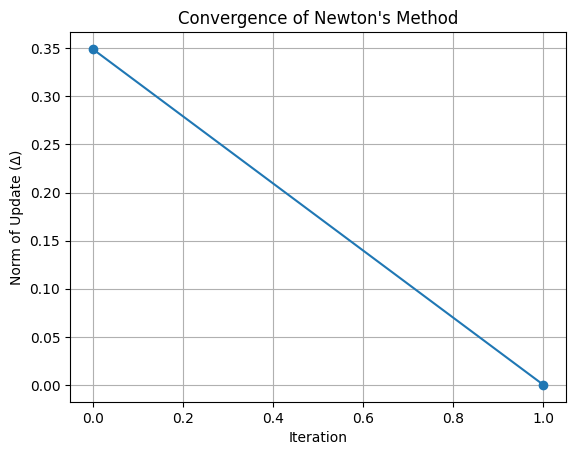

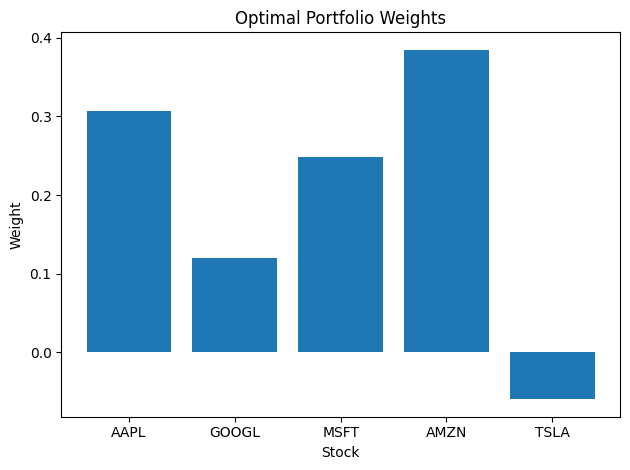

In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ১) ডেটা লোডিং
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
prices = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
returns = prices.pct_change().dropna()
mu = returns.mean().values
Sigma = returns.cov().values

# ২) নিউটন–রাফসন ইটারেশন, কনভার্জেন্স ট্র্যাকিং
n = len(mu)
ones = np.ones(n)

def F(z):
    w, gamma = z[:n], z[n]
    eq1 = 2 * Sigma.dot(w) + gamma * ones
    eq2 = ones.dot(w) - 1.0
    return np.concatenate([eq1, [eq2]])

def J(z):
    top = np.hstack([2 * Sigma, ones.reshape(-1,1)])
    bottom = np.hstack([ones.reshape(1,-1), np.array([[0.0]])])
    return np.vstack([top, bottom])

z = np.concatenate([np.ones(n)/n, [0.0]])
tol, max_iter = 1e-8, 100
convergence = []

for i in range(max_iter):
    delta = np.linalg.solve(J(z), F(z))
    norm_delta = np.linalg.norm(delta)
    convergence.append(norm_delta)
    z = z - delta
    if norm_delta < tol:
        print(f"Converged in {i+1} iterations.")
        break

w_opt = z[:n]

# ৩) গ্রাফিক্যাল প্লটিং

# Plot 1: Convergence of Newton's Method
plt.figure()
plt.plot(convergence, marker='o')
plt.title("Convergence of Newton's Method")
plt.xlabel("Iteration")
plt.ylabel("Norm of Update (Δ)")
plt.grid(True)
plt.show()

# Plot 2: Optimal Portfolio Weights
plt.figure()
plt.bar(stocks, w_opt)
plt.title("Optimal Portfolio Weights")
plt.xlabel("Stock")
plt.ylabel("Weight")
plt.tight_layout()
plt.show()


In [34]:
import yfinance as yf
import pandas as pd
import numpy as np

# ৫টি স্টক সিলেকশন
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Adjusted Close প্রাইস লোড
prices = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# দৈনিক রিটার্ন হিসাব: (P_t / P_{t-1} - 1)
returns = prices.pct_change().dropna()

# প্রত্যাশিত দৈনিক রিটার্ন (mean) ও covariance matrix
mu = returns.mean().values            # shape = (5,)
Sigma = returns.cov().values          # shape = (5,5)

print("Expected daily returns:\n", mu)
print("Covariance matrix:\n", Sigma)


[*********************100%***********************]  5 of 5 completed

Expected daily returns:
 [0.00093893 0.0008408  0.00094103 0.00105974 0.00259225]
Covariance matrix:
 [[0.00041677 0.00027902 0.00026675 0.00028293 0.00043449]
 [0.00027902 0.00051702 0.00030429 0.00029549 0.00043769]
 [0.00026675 0.00030429 0.00042264 0.00028467 0.00037076]
 [0.00028293 0.00029549 0.00028467 0.00036312 0.00036928]
 [0.00043449 0.00043769 0.00037076 0.00036928 0.00183008]]


In [36]:
# dimension
n = len(mu)
ones = np.ones(n)

def F(z):
    """
    F: ℝ^{n+1} → ℝ^{n+1}, যেখানে z = [w (n,), γ (scalar)]
    """
    w = z[:n]
    gamma = z[n]
    # শর্তসমূহ
    eq1 = 2 * Sigma.dot(w) + gamma * ones        # shape = (n,)
    eq2 = ones.dot(w) - 1.0                      # scalar
    return np.concatenate([eq1, [eq2]])

def J(z):
    """
    Jacobian matrix J of F, shape = (n+1, n+1)
    """
    # উপ-ব্লক
    top_left = 2 * Sigma                       # shape = (n,n)
    top_right = ones.reshape(-1,1)             # shape = (n,1)
    bottom_left = ones.reshape(1,-1)           # shape = (1,n)
    bottom_right = np.array([[0.0]])           # shape = (1,1)
    # ব্লকগুলি মার্জ
    top = np.hstack([top_left, top_right])
    bottom = np.hstack([bottom_left, bottom_right])
    return np.vstack([top, bottom])


In [37]:
# ইনিশিয়াল গেস
w0 = np.ones(n) / n   # শুরুতে সব ওয়েট সমান
gamma0 = 0.0
z = np.concatenate([w0, [gamma0]])

tol = 1e-8
max_iter = 100

for i in range(max_iter):
    Fz = F(z)
    Jz = J(z)
    # নিউটন আপডেট: z_new = z - J^{-1} F(z)
    delta = np.linalg.solve(Jz, Fz)
    z = z - delta
    if np.linalg.norm(delta) < tol:
        print(f"Converged in {i+1} iterations.")
        break

# ফলাফল
w_opt = z[:n]
gamma_opt = z[n]
print("Optimal weights:", w_opt)
print("Sum of weights:", w_opt.sum())


Converged in 2 iterations.
Optimal weights: [ 0.30759672  0.11941797  0.24793251  0.38482574 -0.05977294]
Sum of weights: 1.0


In [38]:
# অপ্টিমাল পোর্টফোলিও রিস্ক (variance এবং std)
port_variance = w_opt.T.dot(Sigma).dot(w_opt)
port_std = np.sqrt(port_variance)

print(f"Optimized Portfolio Variance: {port_variance:.6f}")
print(f"Optimized Portfolio Risk (Std Dev): {port_std:.6f}")


Optimized Portfolio Variance: 0.000311
Optimized Portfolio Risk (Std Dev): 0.017623


C:\Users\jihad\AppData\Local\Temp\ipykernel_13180\1265761654.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 5 completed

4 Failed downloads:
['TSLA']: Timeout('Failed to perform, curl: (28) Operation timed out after 10002 milliseconds with 16895 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['AAPL']: Timeout('Failed to perform, curl: (28) Operation timed out after 10009 milliseconds with 18195 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['MSFT']: Timeout('Failed to perform, curl: (28) Operation timed out after 10006 milliseconds with 7130 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['GOOGL']: Timeout('Failed to perform, curl: (28) Operation timed out after 10013 milliseconds with 2599

প্রথম ৩ দিনের ডেটা:
Ticker      AAPL       AMZN  GOOGL  MSFT  TSLA
Date                                          
2020-01-02   NaN  94.900497    NaN   NaN   NaN
2020-01-03   NaN  93.748497    NaN   NaN   NaN
2020-01-06   NaN  95.143997    NaN   NaN   NaN

শেষ ৩ দিনের ডেটা:
Ticker      AAPL        AMZN  GOOGL  MSFT  TSLA
Date                                           
2023-12-27   NaN  153.339996    NaN   NaN   NaN
2023-12-28   NaN  153.380005    NaN   NaN   NaN
2023-12-29   NaN  151.940002    NaN   NaN   NaN

রিটার্নের উদাহরণ (প্রথম ৩ দিন):
Empty DataFrame
Columns: [AAPL, AMZN, GOOGL, MSFT, TSLA]
Index: []

বার্ষিক গড় রিটার্ন:
Ticker
AAPL    NaN
AMZN    NaN
GOOGL   NaN
MSFT    NaN
TSLA    NaN
dtype: float64

টার্গেট রিটার্ন: nan

ইটারেশন 1:
ওয়েট: [nan nan nan nan nan]
রিটার্ন: nan, ঝুঁকি: nan

ইটারেশন 2:
ওয়েট: [nan nan nan nan nan]
রিটার্ন: nan, ঝুঁকি: nan

ইটারেশন 3:
ওয়েট: [nan nan nan nan nan]
রিটার্ন: nan, ঝুঁকি: nan

ইটারেশন 4:
ওয়েট: [nan nan nan nan nan]
রিটার্ন: nan, ঝুঁকি: nan



c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2527 (\N{BENGALI LETTER YYA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad

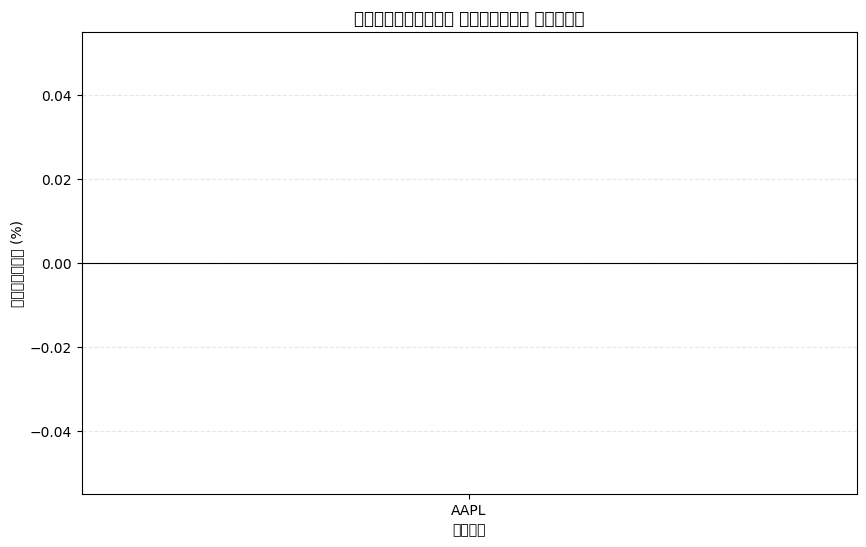

C:\Users\jihad\AppData\Local\Temp\ipykernel_13180\1265761654.py:118: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(individual_risks[i]+0.01, annual_returns[i], stock, fontsize=9)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2461 (\N{BENGALI LETTER JHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2497 (\N{BENGALI VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anac

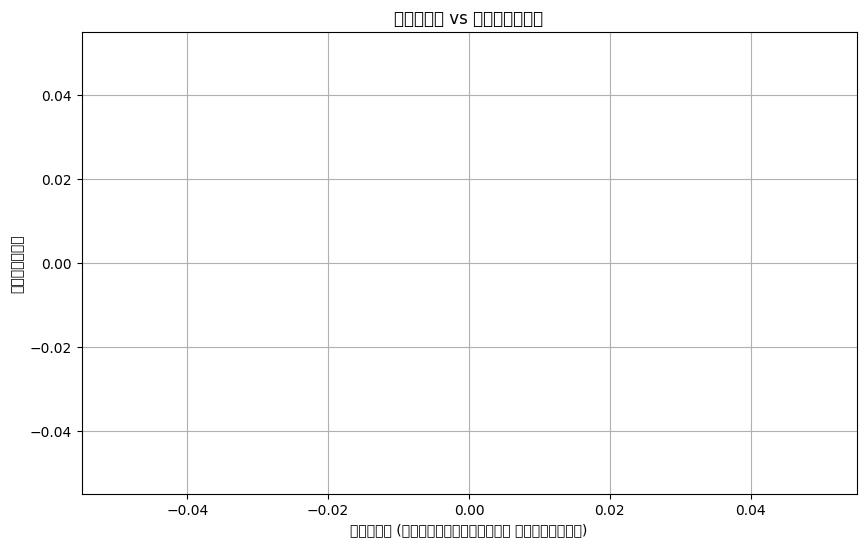

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ১. ডেটা ডাউনলোড করা (সবচেয়ে সহজ পদ্ধতি)
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']  # ৫টি বড় কোম্পানি
start_date = "2020-01-01"
end_date = "2023-12-31"  # নির্দিষ্ট তারিখে শেষ

# ডেটা ডাউনলোড
data = yf.download(stocks, start=start_date, end=end_date)['Close']

# ডেটা প্রিন্ট করে দেখা
print("প্রথম ৩ দিনের ডেটা:")
print(data.head(3))

print("\nশেষ ৩ দিনের ডেটা:")
print(data.tail(3))

# ২. রিটার্ন বের করা (অতি সহজ পদ্ধতি)
daily_returns = data.pct_change().dropna()

print("\nরিটার্নের উদাহরণ (প্রথম ৩ দিন):")
print(daily_returns.head(3))

# ৩. গড় রিটার্ন ও ঝুঁকির হিসাব (সহজ সূত্র)
annual_returns = daily_returns.mean() * 252  # ১ বছরে ২৫২ ট্রেডিং দিন
cov_matrix = daily_returns.cov() * 252  # কোভেরিয়েন্স ম্যাট্রিক্স

print("\nবার্ষিক গড় রিটার্ন:")
print(annual_returns)

# ৪. নিউটন-র্যাফসন পদ্ধতি (সরলীকৃত)
def simple_newton_raphson(target_return):
    n = len(stocks)
    
    # প্রাথমিক ধাপ: সব স্টকে সমান বিনিয়োগ
    weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
    
    # ৫ বার ইটারেশন করলেই যথেষ্ট
    for i in range(5):
        # বর্তমান রিটার্ন ও ঝুঁকি
        current_return = np.dot(weights, annual_returns)
        risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        
        # গ্রেডিয়েন্ট (ঝুঁকির পরিবর্তনের হার)
        gradient = 2 * np.dot(cov_matrix, weights)
        
        # হেসিয়ান (ঝুঁকির দ্বিতীয় ডেরিভেটিভ)
        hessian = 2 * cov_matrix
        
        # নতুন ওয়েট (সরলীকৃত আপডেট)
        weights = weights - np.linalg.inv(hessian) @ gradient / 100
        
        # ওয়েট নরমালাইজেশন (মোট ১০০%)
        weights = weights / np.sum(weights)
        
        print(f"\nইটারেশন {i+1}:")
        print(f"ওয়েট: {weights}")
        print(f"রিটার্ন: {current_return:.4f}, ঝুঁকি: {risk:.4f}")
    
    return weights

# টার্গেট রিটার্ন (সব স্টকের গড়)
target_return = np.mean(annual_returns)
print(f"\nটার্গেট রিটার্ন: {target_return:.4f}")

# অপ্টিমাল ওয়েট বের করা
optimal_weights = simple_newton_raphson(target_return)

# ৫. ফলাফল দেখানো (সহজ গ্রাফ)
# স্টক ও ওয়েট ডেটাফ্রেম
results = pd.DataFrame({
    'স্টক': stocks,
    'ওয়েট': optimal_weights
})

print("\nঅন্তিম ওয়েট:")
print(results)

# ৬. ভিজ্যুয়ালাইজেশন (সহজ বার চার্ট)
plt.figure(figsize=(10, 6))
colors = ['green' if w >= 0 else 'red' for w in optimal_weights]
plt.bar(results['স্টক'], results['ওয়েট']*100, color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.title("পোর্টফোলিও বিনিয়োগ বণ্টন")
plt.xlabel("স্টক")
plt.ylabel("বিনিয়োগ (%)")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# মানগুলো লেখা
for i, weight in enumerate(optimal_weights):
    plt.text(i, weight*100 + (1 if weight >=0 else -2), 
             f'{weight*100:.1f}%', 
             ha='center', va='bottom' if weight >=0 else 'top')

plt.show()

# ৭. ঝুঁকি-রিটার্ন গ্রাফ (সহজ)
individual_risks = np.sqrt(np.diag(cov_matrix))

plt.figure(figsize=(10, 6))
plt.scatter(individual_risks, annual_returns, s=100, color='blue')

# পোর্টফোলিও পয়েন্ট
portfolio_return = np.dot(optimal_weights, annual_returns)
portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
plt.scatter(portfolio_risk, portfolio_return, s=200, color='red', marker='*')

plt.title("ঝুঁকি vs রিটার্ন")
plt.xlabel("ঝুঁকি (স্ট্যান্ডার্ড ডেভিয়েশন)")
plt.ylabel("রিটার্ন")
plt.grid(True)

# লেবেল যোগ করা
for i, stock in enumerate(stocks):
    plt.text(individual_risks[i]+0.01, annual_returns[i], stock, fontsize=9)

plt.text(portfolio_risk+0.01, portfolio_return, 'আপনার পোর্টফোলিও', fontsize=10)

plt.show()